Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
import scipy.stats as sp
import math
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

Add the data for suicide rates

In [2]:
suicides=pd.read_csv('../data/master.csv')

In [3]:
reg=pd.read_csv('reg.csv')

Add the region data from Deaths in conflict dataset to the suicide dataset that did not have Region info

In [4]:
suicides=suicides.merge(reg, on='country')
suicides.rename(columns={"region_y": "region"},inplace=True)

In [5]:
suicides.groupby('year').sum()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1985,52141,574376092,2835.44,180.912,1705380
1986,52822,587393552,2934.53,0.000,1803312
1987,59200,640674852,3052.98,0.000,2499696
1988,55229,596219458,3002.93,0.000,2585136
1989,58234,628116991,3293.08,0.000,2615556
1990,78177,797094521,4043.60,233.424,3394260
1991,78994,807514315,4027.09,0.000,3533472
1992,80815,867118941,4018.18,0.000,3674700
1993,79332,820960923,3871.00,0.000,3566748


In [6]:
#suicides.sort_values("country", inplace = True) 
#filter1 = suicides["year"]==2014
#suicides.where(filter1,inplace = True) 


In [7]:
suicides.dropna(how='all',inplace=True)

In [8]:
suicides.groupby('country').sum()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Albania,527796,1970,62325467,924.76,32.304,490788
Argentina,744000,82219,1035985431,3894.59,93.552,2944044
Armenia,596832,1905,77348173,976.21,66.252,558428
Australia,719940,70111,542377786,4677.41,87.624,11799504
Azerbaijan,383544,1656,111790300,356.24,14.988,192984
Bahrain,504708,463,16753926,467.24,77.244,4545960
Belgium,744000,62761,303302621,7900.50,103.284,11928828
Brazil,744000,226613,4856093548,2174.72,83.388,2266032
Canada,695652,107561,826052183,4338.72,95.160,10748844


In [9]:
grouped= suicides.groupby(['country'], sort=True).sum().reset_index()
grouped= grouped.sort_values(by = ['suicides_no'], ascending=False)
grouped.head(30)

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
13,France,719820,329127,1670756775,7803.25,101.832,11333328
39,Ukraine,672192,319950,1286469184,8931.66,68.496,627492
15,Germany,624780,291262,2024875612,4854.69,95.232,10971240
7,Brazil,744000,226613,4856093548,2174.72,83.388,2266032
41,United Kingdom,744000,136805,1738767780,2790.92,103.620,11869908
19,Italy,744000,132060,1715043704,3168.87,100.176,9896160
24,Mexico,744000,111139,2772959159,1751.19,85.584,2655504
36,Thailand,668508,110643,1584800281,2362.67,79.980,1193102
8,Canada,695652,107561,826052183,4338.72,95.160,10748844
33,Spain,744000,100202,1227661095,3509.06,99.804,7805364


In [10]:
suicides.groupby('country').sum()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Albania,527796,1970,62325467,924.76,32.304,490788
Argentina,744000,82219,1035985431,3894.59,93.552,2944044
Armenia,596832,1905,77348173,976.21,66.252,558428
Australia,719940,70111,542377786,4677.41,87.624,11799504
Azerbaijan,383544,1656,111790300,356.24,14.988,192984
Bahrain,504708,463,16753926,467.24,77.244,4545960
Belgium,744000,62761,303302621,7900.50,103.284,11928828
Brazil,744000,226613,4856093548,2174.72,83.388,2266032
Canada,695652,107561,826052183,4338.72,95.160,10748844


Add the data for deaths in conflict

In [11]:
conflict=pd.read_excel('../data/ged201.xlsx')
conflict.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18,0,0,0,4,4,4,0,700,NaN
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-24,0,0,0,600,600,600,600,700,NaN
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-02-05,0,0,0,2,2,2,0,700,NaN


In [12]:
conflict.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

Remove unnecessary columns

In [13]:
conflict = conflict[['year','country','region','deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown']]

Add extra column to sum all the deaths from all the columns, each of the sides of the conflict, civilians and unknowns

In [14]:
conflict['Total_deaths']=conflict['deaths_a']+conflict['deaths_b']+conflict['deaths_civilians']+conflict['deaths_unknown']

In [15]:
conflict.describe()

,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,Total_deaths
count,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000
mean,2008.933319,2.105016,2.656854,4.360237,2.177452,11.299559
std,8.236476,63.717796,32.812313,187.360638,124.964213,239.542891
min,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2012.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2015.000000,1.000000,2.000000,1.000000,0.000000,5.000000
max,2019.000000,14776.000000,9505.000000,40000.000000,48183.000000,48183.000000


In [16]:
conflict.groupby('year').sum()

,deaths_a,deaths_b,deaths_civilians,deaths_unknown,Total_deaths
year,,,,,
1989,32163,14908,9746,9875,66692
1990,55742,10792,11291,17482,95307
1991,19811,25628,13646,24498,83583
1992,7524,13077,14906,21050,56557
1993,7325,11164,10963,26284,55736
1994,5579,12068,534273,18942,570862
1995,6059,15628,21207,10439,53333
1996,8244,11186,40416,11833,71679
1997,10736,13251,19210,18163,61360


In [17]:
conflict.groupby('country').sum()

,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,Total_deaths
country,,,,,,
Afghanistan,67649762,42811,138495,27458,49180,257944
Albania,7996,0,4,2,0,6
Algeria,8288869,3380,15034,1991,748,21153
Angola,4082424,1286,7670,4093,20190,33239
Argentina,3986,0,0,86,0,86
...,...,...,...,...,...,...
Uzbekistan,64044,188,174,7,31,400
Venezuela,1549928,3,40,725,187,955
Yemen (North Yemen),5296077,10949,7935,4389,5772,29045


In [18]:
new_df = conflict.groupby(['country'], sort=True).sum().reset_index()
new_df = new_df.sort_values(by = ['Total_deaths'], ascending=False)
new_df.head(30)

,country,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,Total_deaths
91,Rwanda,3927580,936,4496,536485,1259,543176
104,Syria,122433759,141558,103200,81635,33450,359843
0,Afghanistan,67649762,42811,138495,27458,49180,257944
35,Ethiopia,4058137,85320,3415,4403,85031,178169
50,Iraq,15548594,13943,46783,28995,31938,121659
29,DR Congo (Zaire),8566138,10039,12988,72429,19403,114859
102,Sudan,6435626,27945,12033,24077,29073,93128
101,Sri Lanka,9166523,14941,38007,11191,1489,65628
81,Nigeria,9269410,6436,17816,17328,15452,57032
47,India,31448842,11642,25246,13719,6109,56716


In [19]:
conflict.groupby('region').sum()

,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,Total_deaths
region,,,,,,
Africa,89710983,176092,129654,741460,251672,1298878
Americas,23308317,11780,22211,14872,50586,99449
Asia,156716406,94446,244004,78901,89977,507328
Europe,18613298,17499,15863,24946,20601,78909
Middle East,164434432,174622,187083,122553,77929,562187


# 1 sample hypothesis test

 H0=mean of deaths in conflict after 2001 in Middle East = 10; H1=mean of deaths in conflict is different than H0

In [20]:
total_deaths=conflict[['year','region','Total_deaths']]
Middle_East = total_deaths[(total_deaths['region'] == 'Middle East')&(total_deaths['year']>2001)] 
deaths_ME=Middle_East['Total_deaths']
deaths_ME.dropna()

40470      1
40471      1
40472      4
40473      1
40474      1
          ..
225302    10
225303     1
225304     1
225305     0
225306     0
Name: Total_deaths, Length: 75923, dtype: int64

In [21]:
deaths_ME.max()
deaths_ME.min()

0

In [22]:
deaths_ME.mean()

6.575477786704951

In [23]:
conflict_mean = deaths_ME.mean()
mu = 10
sample_stdev = deaths_ME.std()
standard_error = sample_stdev / np.sqrt(len(deaths_ME))
t_value = (conflict_mean - mu) / standard_error
print(t_value)

-8.861948076758152


In [24]:
df = len(deaths_ME) - 1
mean, var, skew, kurt = t.stats(df, moments='mvsk')

In [25]:
# retrieve value <= probability
alpha = 0.05
alpha = 1 - alpha
alpha = t.ppf(alpha,deaths_ME)
#print(alpha)
# confirm with cdf
t, p = ttest_1samp(deaths_ME,10)
print(t)
print(p)

-8.861948076755104
8.028153638710254e-19


we can be very certain that the null hypothesis can be rejected, so the mean of death in conflict in the Middle East is different than 10

# 2 sample hypothesis test


  H0: mean of suicide in the range 1989-2016 in 1 country Europe  = mean of deaths in conflict same timeframe in 1 country Middle East
  H1: mean of suicide in the range 1989-2016 in 1 country Europe  ≠ mean of deaths in conflict same timeframe in 1 country Middle East

Selecting one Country in Europe: Germany, one Country in Middle East: Iran, both around 83 mil inhabitants, for this 2 sample hypothesis test

In [27]:
Germany_suicide = suicides[suicides['country'] == 'Germany'] 
Iran_conflict=conflict[conflict['country'] == 'Iran'] 
Germany_Iran = pd.merge(Germany_suicide, Iran_conflict, on='year', how='right')
Germany_Iran.dropna(how='all',inplace=True)
sp.stats.ttest_ind(Germany_Iran.dropna()['suicides_no'], Germany_Iran.dropna()['Total_deaths'])

Ttest_indResult(statistic=33.98783895018233, pvalue=9.616645706764838e-203)

In [28]:
Germany_Iran['suicides_no'].mean()

903.510460251046

In [29]:
Germany_Iran['Total_deaths'].mean()

5.650169491525424

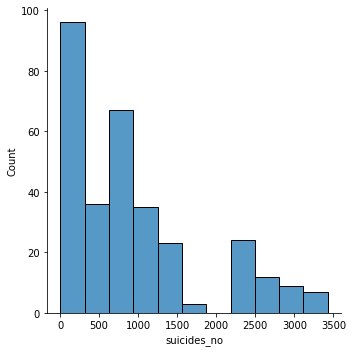

In [30]:
sns.displot(Germany_suicide, x='suicides_no')

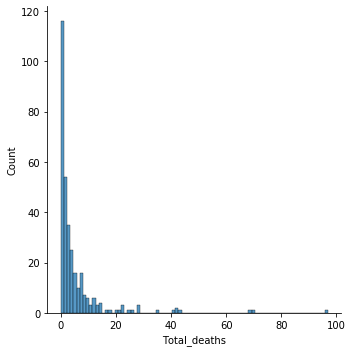

In [31]:
sns.displot(Iran_conflict, x='Total_deaths')

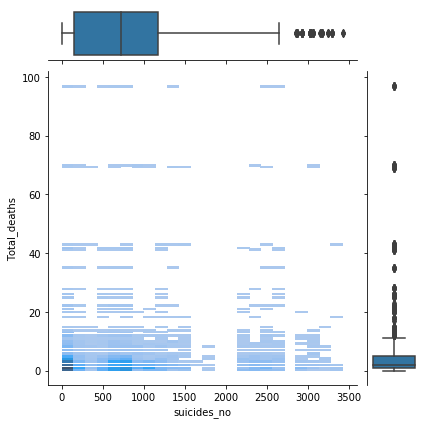

In [32]:
g = sns.JointGrid(data=Germany_Iran, x="suicides_no", y="Total_deaths")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

Our p-value is very small. This means that there is a significant difference between the two sample means.

We will reject the null hypothesis and conclude that there is a significant difference between the mean of suicides in Germany and the mean of deaths in conflict in Iran 

In [33]:
Netherlands_suicide = suicides[suicides['country'] == 'Netherlands'] 
Syria_conflict=conflict[conflict['country'] == 'Syria'] 
Netherlands_Syria = pd.merge(Netherlands_suicide, Syria_conflict, on='year', how='right')
sp.stats.ttest_ind(Netherlands_Syria.dropna()['suicides_no'], Netherlands_Syria.dropna()['Total_deaths'])

Ttest_indResult(statistic=485.3918482190967, pvalue=0.0)

In [34]:
Netherlands_Syria['suicides_no'].mean()

156.10923486689364

In [35]:
Netherlands_Syria['Total_deaths'].mean()

5.842499472127501

In [36]:
Poland_suicide = suicides[suicides['country'] == 'Poland'] 
Iraq_conflict=conflict[conflict['country'] == 'Iraq'] 
Poland_Iraq = pd.merge(Poland_suicide, Iraq_conflict, on='year', how='right')
Poland_Iraq.dropna(how='all',inplace=True)
sp.stats.ttest_ind(Poland_Iraq.dropna()['suicides_no'], Poland_Iraq.dropna()['Total_deaths'])

Ttest_indResult(statistic=nan, pvalue=nan)

# 2 sample hypothesis test 

H0= mean of suicide in the range 1989-2016 in whole region Middle East vs deaths in conflict same timeframe; H1=mean of suicide vs deaths in conflict is higher

In [37]:
ME_suicide = suicides[suicides['region'] == 'Middle East'] 
ME_conflict = conflict[conflict['region'] == 'Middle East'] 

In [38]:
sp.stats.ttest_ind(ME_suicide.dropna()['suicides_no'], ME_conflict.dropna()['Total_deaths'])

Ttest_indResult(statistic=3.619582222687617, pvalue=0.0002952560924923878)

Our p-value is very small, 0.0002. This means that there is a significant difference between the two sample means.
We will reject the null hypothesis and conclude that there is a significant difference between the mean of suicides in Middle East and the mean of deaths in conflict in Middle East 


In [39]:
ME_suicide['suicides_no'].mean()

19.11764705882353

In [40]:
ME_conflict['Total_deaths'].mean()

6.8805243124824065

In [41]:
Africa_suicide = suicides[suicides['region'] == 'Africa'] 
Africa_conflict = conflict[conflict['region'] == 'Africa'] 

In [42]:
sp.stats.ttest_ind(Africa_suicide.dropna()['suicides_no'], Africa_conflict.dropna()['Total_deaths'])

Ttest_indResult(statistic=0.14740491772576403, pvalue=0.882813087397694)

In [43]:
Africa_suicide['suicides_no'].mean()

30.504166666666666

In [44]:
Africa_conflict['Total_deaths'].mean()

29.042729691657538

In [45]:
afr_s=Africa_suicide.groupby('year').mean()

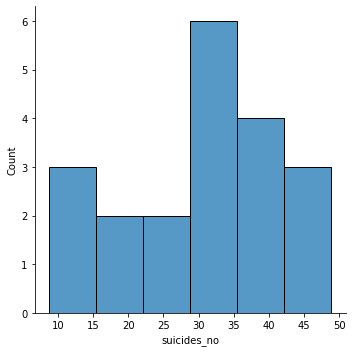

In [46]:
sns.displot(afr_s, x='suicides_no')

In [47]:
afr=Africa_conflict.groupby('year').mean()

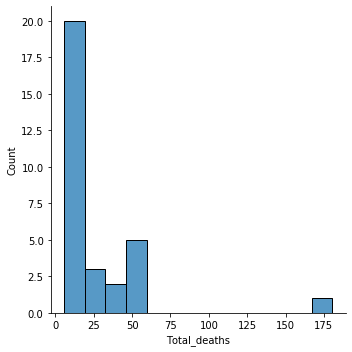

In [48]:
sns.displot(afr, x='Total_deaths')

Text(0.5, 1.0, 'Mean of suicides')

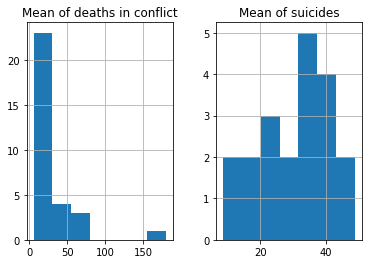

In [49]:
fig, axes = plt.subplots(1, 2)

afr.hist('Total_deaths', bins=7, ax=axes[0])
afr_s.hist('suicides_no', bins=7, ax=axes[1])
axes[0].set_title('Mean of deaths in conflict')
axes[1].set_title('Mean of suicides')


In [50]:
Americas_suicide = suicides[suicides['region'] == 'Americas'] 
Americas_conflict = conflict[conflict['region'] == 'Americas'] 
sp.stats.ttest_ind(Americas_suicide.dropna()['suicides_no'], Americas_conflict.dropna()['Total_deaths'])

Ttest_indResult(statistic=42.897096670867406, pvalue=0.0)

In [51]:
Americas_suicide['suicides_no'].mean()

145.89771689497718

In [52]:
Americas_conflict['Total_deaths'].mean()

8.555488644184447

In [53]:
Asia_suicide = suicides[suicides['region'] == 'Asia'] 
Asia_conflict = conflict[conflict['region'] == 'Asia'] 
sp.stats.ttest_ind(Asia_suicide.dropna()['suicides_no'], Asia_conflict.dropna()['Total_deaths'])

Ttest_indResult(statistic=101.65592583364273, pvalue=0.0)

In [54]:
Asia_suicide['suicides_no'].mean()

193.18457648546143

In [55]:
Asia_conflict['Total_deaths'].mean()

6.501371197170464

In [56]:
Europe_suicide = suicides[suicides['region'] == 'Europe'] 
Europe_conflict = conflict[conflict['region'] == 'Europe'] 
sp.stats.ttest_ind(Europe_suicide.dropna()['suicides_no'], Europe_conflict.dropna()['Total_deaths'])

Ttest_indResult(statistic=47.132297544654264, pvalue=0.0)

In [57]:
Europe_suicide['suicides_no'].mean()

298.9929145921103

In [58]:
Europe_conflict['Total_deaths'].mean()

8.48757663762504

In [59]:
Europe_suicide['suicides_no'].std()

568.7536555424845

# Confidence Intervals

In [60]:
sample_size = len(Europe_suicide['suicides_no']) 
stdev_Europe = Europe_suicide['suicides_no'].std()
marg_of_error = stdev_Europe / np.sqrt(sample_size)
confidence_level = 0.95
z = stats.norm.interval(confidence_level)[1] 
sample_mean = np.mean(Europe_suicide['suicides_no'])
con_int = [sample_mean - (z * marg_of_error) , (sample_mean + (z * marg_of_error))]
list(con_int)
print(f"With 95% confidence, the true mean for suicide rates in Europe lies within the interval {con_int[0]} and {con_int[1]}.")

With 95% confidence, the true mean for suicide rates in Europe lies within the interval 283.56689572194284 and 314.4189334622778.


In [61]:
sample_size = len(Africa_conflict['Total_deaths']) 
stdev_Africa = Africa_conflict['Total_deaths'].std()
marg_of_error = stdev_Africa / np.sqrt(sample_size)
confidence_level = 0.95
z = stats.norm.interval(confidence_level)[1] 
sample_mean = np.mean(Africa_conflict['Total_deaths'])
con_int = [sample_mean - (z * marg_of_error) , (sample_mean + (z * marg_of_error))]
list(con_int)
print(f"With 95% confidence, the true mean for deaths in conflict in Africa lies within the interval {con_int[0]} and {con_int[1]}.")

With 95% confidence, the true mean for deaths in conflict in Africa lies within the interval 24.30651975827893 and 33.778939625036145.


In [62]:
sample_size = len(Africa_suicide['suicides_no']) 
stdev_Africa1 = Africa_suicide['suicides_no'].std()
marg_of_error = stdev_Africa1 / np.sqrt(sample_size)
confidence_level = 0.95
z = stats.norm.interval(confidence_level)[1] 
sample_mean = np.mean(Africa_suicide['suicides_no'])
con_int = [sample_mean - (z * marg_of_error) , (sample_mean + (z * marg_of_error))]
list(con_int)
print(f"With 95% confidence, the true mean for suicides in Africa lies within the interval {con_int[0]} and {con_int[1]}.")

With 95% confidence, the true mean for suicides in Africa lies within the interval 25.925146391295435 and 35.0831869420379.
